Case Study on Testing of Hypothesis

A company started to invest in digital marketing as a new way of their product
promotions.For that they collected data and decided to carry out a study on it.

● The company wishes to clarify whether there is any increase in sales after
stepping into digital marketing.

● The company needs to check whether there is any dependency between the
features “Region” and “Manager”.

In [122]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind

from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2

 
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
data=pd.read_csv('Sales_add.csv')
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [125]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


#  The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

In [126]:
#before=data['Sales_before_digital_add(in $)']
#after=data['Sales_After_digital_add(in $)']
sale_change=pd.DataFrame({"Sales_before_digital_add(in $)":before,"Sales_After_digital_add(in $)":after,"sale_change":after-before})

In [127]:
sale_change.head()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $),sale_change
0,132921,270390,137469
1,149559,223334,73775
2,146278,244243,97965
3,152167,231808,79641
4,159525,258402,98877


In [128]:
sale_change.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $),sale_change
count,22.000000,22.000000,22.000000
mean,149239.954545,231123.727273,81883.772727
std,14844.042921,25556.777061,31765.635671
min,130263.000000,187305.000000,10110.000000
25%,138087.750000,214960.750000,60094.000000
50%,147444.000000,229986.500000,92763.500000
75%,157627.500000,250909.000000,99342.000000
max,178939.000000,276279.000000,137469.000000


Taking Hypothesis:

 . Null Hypothesis Ho:There is no change in sales after stepping into digital marketing 
   ( Sales_After_digital_add  <= Sales_before_digital_add )
   
 . Alternative Hypothesis Ha:Increase in sales after stepping into digital marketing
   (Sales_After_digital_add > Sales_before_digital_add)
   
 . Taking significance value as aplpha(α):0.05.
perform 1-tailed 2 sample test

In [129]:
stat, p =stats.ttest_ind(before,after)
print('p=',p)
#print('t=',stat)
print('t=%.3f, p=%.3f' % (stat, p))

p= 2.614368006904645e-16
t=-12.995, p=0.000


In [130]:
if p <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

we reject null hypothesis


Here, the p value is very small.The pvalue < alpha value(0.05) . so we can reject the Null Hypothesis. Alternative Hypothesis is true that is,there is Increase in sales after stepping into digital marketing .

# The company needs to check whether there is any dependency between the features “Region” and “Manager”.

Here we want to examine if there is a relationship between ‘Region’ and ‘Manager’.Use Chi-Square Test.


In [131]:
#Contingency Table

contigency= pd.crosstab(data['Region'], data['Manager'])
contigency

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [132]:
contigency_pct = pd.crosstab(data['Region'], data['Manager'], normalize='index')
contigency_pct

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,0.400000,0.300000,0.300000
Region - B,0.571429,0.142857,0.285714
Region - C,0.200000,0.600000,0.200000


<AxesSubplot:xlabel='Manager', ylabel='Region'>

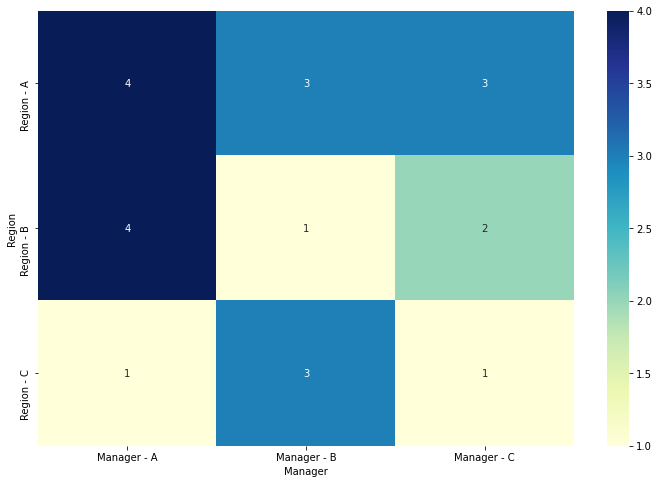

In [133]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

Hypothesis:

The null hypothesis (Ho) is that there is no significant relationship between ‘Region’ and ‘Manager’.

The alternative hypothesis (Ha) is that there is significant relationship between ‘Region’ and ‘Manager’.

In [134]:
#chi2: The test statistic
#p: The p-value of the test
#dof: Degrees of freedom
#expected: The expected frequencies, based on the marginal sums of the table

stat, p, dof, expected = chi2_contingency(contigency)
print('dof=%d' % dof)
print('Expected:',expected)
print('stat=',stat)
print('pvalue =',p)


dof=4
Expected: [[4.09090909 3.18181818 2.72727273]
 [2.86363636 2.22727273 1.90909091]
 [2.04545455 1.59090909 1.36363636]]
stat= 3.050566893424036
pvalue = 0.5493991051158094


In [135]:
# interpret p-value
alpha = 0.05
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

significance=0.050, p=0.549
Independent (fail to reject H0)


Here,p value is greater than alpha(0.549>0.05).so we can't reject Null Hypothesis(Ho).That is there is no significant relationship between ‘Region’ and ‘Manager’.